# Midterm IS2002B. Student ID: xxxxxx
## General comments 
This Midterm integrates knowledge and skills acquired in the first half of the semester, especially in the last 6 Assignments. You are allowed to use any document and source on your computer and look up documents on the internet. You or not allowed to share documents, or communicate in any other way with people inside or outside the class room during the midterm. To finish the midterm in the alloted 2 hrs, you will have to work fast and efficiently. Good luck!
## Preliminaries
Sets up the environment by importing pandas, numpy, and matplotlib. Because we are using plots make sure that you configure your notebook such that plots are shown inline (see Assignment 2). 

In [2]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.stats as ss
import pandas as pd 
import numpy as np
import seaborn as sb

## Data set 
The data set for the midterm is a *random* sample of 377 observations from the US 2000 census. A census is a count of the entire population of the US, conducted every 10 years. 16% of the population (selected at random) also fill out a long-form. The present data comes from these long-form respondents. 

The data frame contains the data
- censusYear:		Census Year.
- state:			Name of state.
- area:             Rough geographic area of the state (east, north, west, & south) 
- familyIncome: 	Total family income (in U.S. dollars).
- age: 			    Age (years)
- sex: 			    Sex with levels Female and Male.
- raceGeneral: 	    Race with levels White, Black, Other 
- maritalStatus: 	Marital status with levels Divorced, Married, Single, and Widowed.
- personalIncome:  	Total personal income (in U.S. dollars). 

https://en.wikipedia.org/wiki/2000_United_States_Census


## Task 1: Geographic area and race (35pt)
In this task you will explore the connection between the geographic area (Western states, East coast, the south, the upper midwest, i.e. north) and the general race (white, black, other). 

### Question 1 (8pt)
Generate a table with the conditional probabilities of being of white, black or other racial background (raceGeneral), given that the respondent lived in the north, south, west and east (area). Then generate a plot that  is ideally suited to let you compare the relative racial proportions of people in each area. Remember to provide axis lables and a caption. Written answer: Which proportions appears larger for a particular area than for any of the others?  

In [7]:
df = pd.read_csv("census.csv")
T = pd.crosstab(df.raceGeneral,df.area)
display(T)

area,east,north,south,west
raceGeneral,,,,
Black,19,3,23,2
Other,13,6,5,24
White,82,73,84,43


In [10]:
T = pd.crosstab(df.area,df.raceGeneral,normalize='index')
T

raceGeneral,Black,Other,White
area,,,
east,0.166667,0.114035,0.719298
north,0.036585,0.073171,0.890244
south,0.205357,0.044643,0.750000
west,0.028986,0.347826,0.623188


Text(0, 0.5, 'proportion')

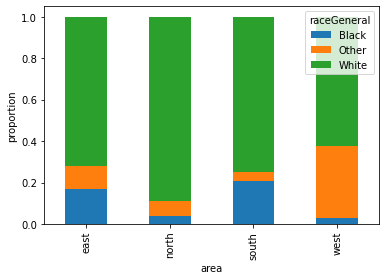

In [11]:
T.plot(kind='bar',stacked=True)
plt.ylabel('proportion')

*Figure 1*. Stacked bar plot of race proportions grouped by area

> The proportion of white individuals appears higher in the north than in any other, whereas the 'other' category is higher in the west than in any other region.  

### Question 2 (5pt)
What measurement scale does area, raceGeneral, and personalIncome have?    

>Area: Nominal scale<br>
>raceGeneral: Nominal scale<br>
>personalIncome: Ratio scale<br>

### Question 3 (5pt)
We want to test the hypothesis that the proportion of white people is different in the western states (area = 'west') than in the eastern states (area = 'east). Formulate precisely the null hypothesis and the alternative hypothesis. To test this idea, will you have to conduct a one-sided or two-sided test? 

>Alternative Hypothesis: The relative proportion of white people is different in western than in eastern states. 

>Null Hypothesis: The relative proportion of white people in western states is equal to that of eastern states. 

>This is a undirected hypothesis - i.e. I have to use a two-sided test. 

### Question 4 (10pt)
Perform a randomization test to test whether you can reject the Null-hypothesis. What statistics are you going to use to test the hypothesis formulated in Question 3? Your code should produce a figure, which shows the distribution of chosen test statistics under the Null hypothesis, as well as the empirical value as a vertical line.  Remember to provide axis lables and a caption. Written answer: Report the value of the statistics and the associated p-value, using at least 1000 iterations. What do you conclude regarding the hypotheses formulated above? 

 P-value of the randomisation test is p=  0.16


0.16

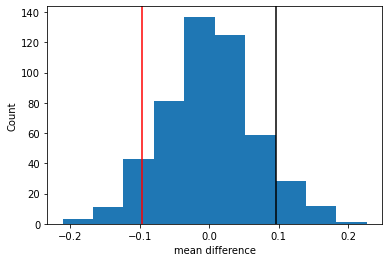

In [19]:
def condt(D): #east minus west
    T = pd.crosstab(D.area,D.raceGeneral,normalize='index')
    eastmwest = T['White']['east'] - T['White']['west']
    return eastmwest

def perf_rand(D,fcn,shuffle,numIterations=500,sides=1, nbins = 10):    
    listOfTS =  np.array(range(numIterations),dtype = 'float64')
    for i in range(numIterations):
        #1. Randomly shuffle the data 
        S=D.copy()                    # Make copy of the data frame
        x = np.array(range(len(D.index))) # Make copy of the data frame
        np.random.shuffle(x)          # randomly shuffle x - note that this changes x itself! 
        y = S[shuffle].iloc[x]   # copy the newly reorded values into a new Series  
        y = y.reset_index(drop=True)   #reoder the indices 
        S[shuffle]=y           # Copy back into the data frame
        
        #2. Calculate test statistics 
        listOfTS[i] = fcn(S)

    # 3. Caluclate the real test statistic 
    realTS = fcn(D)
      
    # 4. Plot a histogram of the 
    plt.hist(listOfTS,bins= nbins)
    plt.axvline(x=realTS, color='k')
    plt.xlabel('mean difference')
    plt.ylabel('Count')
    
    # 5. determine p-value (one sided)
    if sides==1: 
        p=sum(listOfTS>=realTS)/len(listOfTS)
    if sides==2:
        plt.axvline(x=-realTS, color='r')
        p=sum(np.absolute(listOfTS)>=realTS)/len(listOfTS)
        print(' P-value of the randomisation test is p= ',p)
    return p

perf_rand(df,condt,"raceGeneral",sides=2)

*Figure 2*. Histogram showing the distribution of test statistic under the null hypothesis. p-values corresponding to a two-sided test are shown as vertical lines.

### Question 5 (7pt)
Based on the results from question 3, a news outlet publishes the following headline: "New study finds that racial diversity is equal on east and west coast of the US". What are possible problems with this claim? 

## TASK 2: Racial inequality in annual income (27pt)
### Question 1 (10pt)
Generate a visualisation of personal income depending on the general racial background of the person (White, Black, Other). The visualization should show medians, quartiles and let you make some inference about the shape of the distribution.  Remember to provide axis lables and a caption. Written answer: What is the shape of the distribution for the personalIncome based on your plot? Which racial category earns the most? Which one the least? 

<AxesSubplot:xlabel='raceGeneral', ylabel='personalIncome'>

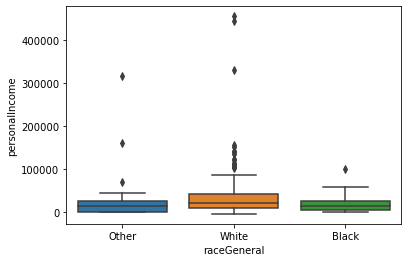

In [25]:
sb.boxplot(x='raceGeneral',y='personalIncome',data=df)

*Figure 3*. violinplots for personal income grouped by the race (white, black, and other).

### Question 2 (10pt)
Using a bootstrap, determine the *median* personal income and the 95% confidence interval for the median for white people and for black people seperately. Each bootstrap sample should contain as many data points as are in the sample. Tip 1: Write a function and then call it with the data of personal income for black and white people separately. 
Tip 2: You can get the number of elements in a data Series with data.shape[0] 

In [26]:
def bootstrap(data, fcn, numIter = 1000):
    it = 0 ## setting the iteration variable to zero. It will be increased each time a loop is executed
    stats = np.array(range(numIter), dtype = 'float64') ## initializing the stats array (the function output)
    N = data.shape[0]
    while it < numIter:
        sample = np.random.choice(data, size = N, replace = True) ## Generates a random sample from a given 1-D array 
        stats[it] = fcn(sample)  
        it = it + 1
    return stats

def confidenceInt(data, prec):
    lp = (100 - prec)/2
    Int = [np.percentile(data, lp), np.percentile(data, 100-(lp/2))]
    return Int

def doInterval(data): 
    stats = bootstrap(data,np.median)
    sb.distplot(stats)
    plt.xlabel('personalIncome')
    plt.ylabel('proportion')
    A=confidenceInt(stats,95)    
    print('the median of distribution is %.3f\n' % np.median(stats))
    print('the 95 percent confidence interval is %.3f - %.3f' % (A[0],A[1]))
        
        

the median of distribution is 21850.000

the 95 percent confidence interval is 16991.250 - 24550.000


/Users/oren/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


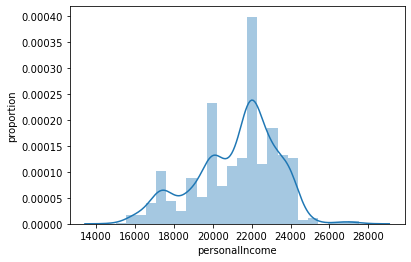

In [28]:
doInterval(df.personalIncome[df.raceGeneral=='White'])

*Figure 4*. Distribution of the median of personal income of white people.

the median of distribution is 15000.000

the 95 percent confidence interval is 10000.000 - 21000.000


/Users/oren/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


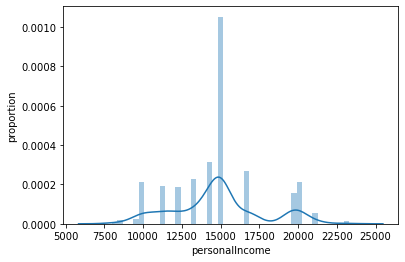

In [30]:
doInterval(df.personalIncome[df.raceGeneral=='Black'])

*Figure 5*. Distribution of the median of personal income of black people.

### Question 3 (7pt)
Is the confidence interval for the median income larger for white or black people in the US? Why? 

## Task 3: Testing for a north-south income difference (38pt)
### Question 1 (8pt)
Make a violin plot of the personalIncome (y-variable), depending on the geographic area (x-variable).  Remember to provide axis lables and a caption. What do you see if you compare incomes in the south and the north of the US? How do the means compare? How do the medians compare? Why do these two statistics apparently give you different answers?  

*Figure 6*. violinplots of the personal income grouped by the area.

### Question 2: Hypotheses (5pt)
Test the hypothesis that the *median* personal income in the south is *lower* than in in the north. Formulate the null- and alternative hypotheses. 

>Alternative hypothesis: 
Median Income (north) > Median Income (south) 

>Null Hypothesis: 
Median Income (north) <= Median Income (south) 


### Question 3: Randomization test (10pt)
Perform a randomisation test to test the null-hypothesis. When doing so, restrict the analysis and the randomisation test to data that comes from people in the north and south (excluding "east" and "west"). Conduct a one- or two-sided test (as appropriate for the hypothesis).  What can you conclude? 

*Figure 7*. histogram showing the distribution of the differences between median (test statistic) of the personal income in east and west areas. 

### Question 4: SD of bootstrap samples (5pt)

Modify your randomization function, so it prints out the standard deviation of the median differences under the null-hypothesis. 

*Figure 8*. histogram showing the distribution of the differences between median (test statistic) of the personal income in east and west areas. 

### Question 5: Bayesian hypothesis testing (10pt)
Using the normal approximation, conduct a Bayesian hypothesis test of the null vs. alternative hypothesis formulated in question 2. For the null hypothesis, assume that the median difference has a mean of 0 and a SD of the that you found in Question 3. We are testing the alternative hypothesis that the median income in the north is  10000 USD higher than in the south. Starting from equal prior probabilities, report the BF and posterior probability for the Null-hypothesis. What would you conclude? Comment your code to show your calculations. 